# **Phase 1 - Data Cleaning**

In [ ]:
#This is the dataset of Motor Vehicle Collision in the New York City.
#The dataset is taken from government website - (https://catalog.data.gov/dataset/motor -vehicle-collisions-crashes)

In [ ]:
#Mounting drive would allow to access the dataset placed on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

file = "/path/to/csv/Motor_Vehicle_Collisions_-_Crashes_20250105.csv"
data = pd.read_csv(file, low_memory=False)

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
#understanding the data
print(data.shape)
print(data.columns)
print(data.info())

(2146664, 29)
Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146664 entries, 0 to 2146663
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   

**Cleaning 1: Handling Missing Values**

With this cleaning step, we handle missing values in the dataset. It replaces missing numeric values in specified columns with 0 and fills missing categorical values in specified columns with 'Unspecified'.

In [ ]:
#Cleaning 1: Handling Missing Values

missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

print("-----------------")

missing_data = data.isnull().sum() / len(data) * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

Missing values per column:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           665561
ZIP CODE                          665824
LATITUDE                          239544
LONGITUDE                         239544
LOCATION                          239544
ON STREET NAME                    460905
CROSS STREET NAME                 818433
OFF STREET NAME                  1778132
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7296
CONTRIBUTING FACTOR VEHICLE 2     338547
CONTRIBUTING FACTOR VEHICLE 3    1992088
CONTRIBUTING FACTOR VEHICLE 4    2111505
CONTRIBUTING FACTOR VEHICLE 5    2137059
COLLISION_ID                 

In [ ]:
# Replaced missing numeric values with 0
numerical_cols_to_be_replaced_by_Zero  = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
data[numerical_cols_to_be_replaced_by_Zero] = data[numerical_cols_to_be_replaced_by_Zero].fillna(0)

# Replaced missing categorical values (e.g., 'CONTRIBUTING FACTOR VEHICLE 1') with 'Unspecified'
categorical_cols_to_be_replaced_by_unspecified = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
                   'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                                                 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
data[categorical_cols_to_be_replaced_by_unspecified] = data[categorical_cols_to_be_replaced_by_unspecified].fillna('Unspecified')


In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)
# How it helps:
# Prior to handling: Identifying missing data informs us which columns may cause issues in modeling.
# After addressing: By Addressing missing data we make sure that our dataset is more reliable and it improves the quality of our analysis.

Missing values per column:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           665561
ZIP CODE                          665824
LATITUDE                          239544
LONGITUDE                         239544
LOCATION                          239544
ON STREET NAME                    460905
CROSS STREET NAME                 818433
OFF STREET NAME                  1778132
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                 

**Cleaning 2: Dropping unnecessary colums**

In this step, we will drop unnecessary columns. We are dropping the Location column because we already have separate columns for Latitude and Longitude.

In [ ]:
#Cleaning 2: Dropping unnecessary columns
data.drop('LOCATION', axis=1, inplace=True)
# How it helps:
# Prior to dropping: Unnecessary columns makes it more complex to handle dataset, and it makes the analysis less efficient
# After dropping: After dropping the unnecessary columns we can focus on the most important features with the simplified dataset.

**Cleaning 3: Removing Duplicates**

In this step, we first check if the dataset has any duplicates. If there are any duplicates found, then we will drop them.

In [ ]:
#Cleaning 3: Removing Duplicates

#checking for duplicates
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
duplicate_rows = data[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [CRASH DATE, CRASH TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5]
Index: []

[0 rows x 28 columns]


**Cleaning 4: Standardizing DateTime**

In this step, we will standardize the values in Crash Date column.

In [ ]:
# Cleaning 4: Standardizing Date Column

# Standardizing the "CRASH_DATE" column to (YYYY-MM-DD) format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE']).dt.strftime('%Y-%m-%d')

data.head()

# How it helps:
# Prior to standardizing: Inconsistent date formats can lead to errors when performing time-based analysis.
# After standardizing: Uniform date formats ensures correct time-based analysis and helps us to handle date columns accurately.

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,Unspecified,Unspecified,Unspecified,4455765,Sedan,Sedan,Unspecified,Unspecified,Unspecified
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,Unspecified,Unspecified,Unspecified,Unspecified,4513547,Sedan,Unspecified,Unspecified,Unspecified,Unspecified
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,Unspecified,Unspecified,Unspecified,4541903,Sedan,Pick-up Truck,Unspecified,Unspecified,Unspecified
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,NaN,NaN,1211 LORING AVENUE,0.0,...,Unspecified,Unspecified,Unspecified,Unspecified,4456314,Sedan,Unspecified,Unspecified,Unspecified,Unspecified
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,Unspecified,Unspecified,Unspecified,Unspecified,4486609,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified


In [ ]:
# Checking to ensure there are no null / missing dates in Crash Time and Crash Date
print("Missing Start Dates:", data['CRASH DATE'].isnull().sum())
print("Missing End Dates:", data['CRASH TIME'].isnull().sum())

Missing Start Dates: 0
Missing End Dates: 0


**Cleaning 5: DataType Consistency**

In this step, we will check whether the required columns are of the appropriate datatype.

For example, ensuring Number of Persons Injured is Numeric.

In [ ]:
# Cleaning 5: Data Type Consistency
# need to make sure that the required columns have appropriate data types for analysis.
print("Columns in DataFrame:", data.columns.tolist())

Columns in DataFrame: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


In [ ]:
#listing numerical data type columns and converting to float

# Converting numerical columns to float type
numeric_columns = [
    'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]
injured_columns = [
    'NUMBER OF PERSONS INJURED'
]
data[numeric_columns] = data[numeric_columns].astype(float)

# Converting categorical columns to 'category' type for efficient memory utilisation
categorical_columns = [
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]
data[categorical_columns] = data[categorical_columns].astype('category')

print(data.dtypes)

CRASH DATE                         object
CRASH TIME                         object
BOROUGH                            object
ZIP CODE                           object
LATITUDE                          float64
LONGITUDE                         float64
ON STREET NAME                     object
CROSS STREET NAME                  object
OFF STREET NAME                    object
NUMBER OF PERSONS INJURED         float64
NUMBER OF PERSONS KILLED          float64
NUMBER OF PEDESTRIANS INJURED     float64
NUMBER OF PEDESTRIANS KILLED      float64
NUMBER OF CYCLIST INJURED         float64
NUMBER OF CYCLIST KILLED          float64
NUMBER OF MOTORIST INJURED        float64
NUMBER OF MOTORIST KILLED         float64
CONTRIBUTING FACTOR VEHICLE 1    category
CONTRIBUTING FACTOR VEHICLE 2    category
CONTRIBUTING FACTOR VEHICLE 3    category
CONTRIBUTING FACTOR VEHICLE 4    category
CONTRIBUTING FACTOR VEHICLE 5    category
COLLISION_ID                        int64
VEHICLE TYPE CODE 1              c

**Cleaning 6: Removing Outliers**

In this step, we will identify and drop outliers in our data, which might negatively affect our analysis.

In [ ]:
#Cleaning 6: Removing Outliers - values which are very far from the normal range (IQR) i.e. below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# detecting outliers for the injured_column
outliers = {}
for col in injured_columns:
    outliers[col] = detect_outliers_iqr(data[col])
    print(f"Outliers in {col}: {len(outliers[col])}")

print(f"data shape before removing outliers: {data.shape}")

Outliers in NUMBER OF PERSONS INJURED: 2712
data shape before removing outliers: (2146664, 28)


In [ ]:
# Dropping outliers from the dataset
for col in injured_columns:
    data = data[~data.index.isin(outliers[col].index)]

print("Data shape after dropping outliers:", data.shape)

# How it helps:
# Before removing: Outliers usually skew the data analysis which can lead to misinterpretations or inaccurate analysis.
# After removing: Removing outliers make the data less skew and helps to improve model performance and make the results more meaningful.

Data shape after dropping outliers: (2143952, 28)


**Cleaning 7: Standardizing Categorical Columns**

In this step, we will remove any unnecessary characters and replace null values with unknown to make sure our categorical columns have uniformity.

In [ ]:
#Cleaning 7: Standardizing Categorical columns
for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower().fillna('unknown')


# How it helps:
# Prior to standardizing: Inconsistent formatting.
# After standardizing: By stripping spaces, converting to lowercase, and filling nulls with 'unknown', we ensure consistency.


In [ ]:
# #we can also save this updated data into a csv using the following command -
# data.to_csv('cleaned_dataset_with_standardized_text.csv', index=False)

**Cleaning 8: Handling Geographical Data**

In this step, we will make sure our Latitude and Longitute values are within a fixed range.


In [ ]:
# Cleaning 8: Handling Geographical Data

# Step 1: Validating ranges for latitude and longitude
# Latitude should be between -90 and 90, and Longitude should be between -180 and 180.
data['LATITUDE'] = data['LATITUDE'].apply(lambda x: x if -90 <= x <= 90 else None)
data['LONGITUDE'] = data['LONGITUDE'].apply(lambda x: x if -180 <= x <= 180 else None)

# How it helps:
# Prior to validation: Out-of-range Geographical data can lead to errors in mapping and location-based errors.
# After validation: By converting our latitude and longitude within valid ranges, we make sure that our further analysis will be reliable.

In [ ]:
#Cleaning 9: Normalizer could be added

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# data[['Total Damage', 'AID Contribution']] = scaler.fit_transform(data[['Total Damage', 'AID Contribution']])

**Cleaning 10: Handling critical columns by adding new feature/s**

In this step, we are creating a new category which will classify each incident based on how many people were injured in it.

In [ ]:
#cleaning 10:
critical_columns = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED']

# Step 1: Create a new column 'Critical Missing'
data['Critical Missing'] = data[critical_columns].isnull().any(axis=1)

# Step 2: Creating categories based on number of people injured
bins = [0, 2, 4, float('inf')]
labels = ['Low', 'Medium', 'High']
data['Accident Category'] = pd.cut(data['NUMBER OF PERSONS INJURED'], bins=bins, labels=labels, right=False)
data.head()

# How it helps:
# Prior to categorization: Missing data in critical columns could lead to serious error in analysis.
# After categorization: Segmenting critical columns helps us to find better trends and analysis.

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Critical Missing,Accident Category
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,unspecified,unspecified,4455765,sedan,sedan,unspecified,unspecified,unspecified,True,Medium
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,unspecified,unspecified,4513547,sedan,unspecified,unspecified,unspecified,unspecified,True,Low
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,unspecified,unspecified,4541903,sedan,pick-up truck,unspecified,unspecified,unspecified,True,Low
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,NaN,NaN,1211 LORING AVENUE,0.0,...,unspecified,unspecified,4456314,sedan,unspecified,unspecified,unspecified,unspecified,False,Low
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,unspecified,unspecified,4486609,unspecified,unspecified,unspecified,unspecified,unspecified,False,Low


**Cleaning 11: Calculating Total Injuries**

In this step, we will calculate overall injuries and deaths for all things involved in the incidents.

In [ ]:
#Cleaning 11: Creating a new column to track total injuries and deaths

# Step 1: Create a new column "Total Injuries"
data['Total Injuries'] = data['NUMBER OF PERSONS INJURED'] + data['NUMBER OF PEDESTRIANS INJURED'] + data['NUMBER OF CYCLIST INJURED'] + data['NUMBER OF MOTORIST INJURED']

# Step 2: Create a new column "Total Deaths"
data['Total Deaths'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PEDESTRIANS KILLED'] + data['NUMBER OF CYCLIST KILLED'] + data['NUMBER OF MOTORIST KILLED']

# Step 3: Create a new column "Total Affected"
data['Total Affected'] = data['Total Injuries'] + data['Total Deaths']

print("Total Injuries:", data['Total Injuries'].sum())
print("Total Deaths:", data['Total Deaths'].sum())
# How it helps:
# Prior to creating these columns: Number of injuries and deaths were separated in different columns which made it difficult to access the total impact.
# After creating these columns: We can see a consolidated view of the injuries, deaths and affected in 3 columsn instead of 8.

Total Injuries: 1323234.0
Total Deaths: 6462.0


In [ ]:
#Cleaning 11-extended: validating data consistency

data['Total Affected Check'] = data['Total Injuries'] + data['Total Deaths']
inconsistent_total_affected = data[data['Total Affected'] != data['Total Affected Check']]

print("Inconsistent Total Affected Rows:", inconsistent_total_affected.shape[0])

if inconsistent_total_affected.empty:
    print("Data is consistent")
else:
    print("Inconsistent Total Affected Rows:")
    print(inconsistent_total_affected[['Total Affected', 'Total Affected Check']])

Inconsistent Total Affected Rows: 0
Data is consistent


**Cleaning 12: Seasonal Tracking**

In this step, we are categorizing our incidents based on the season. Since our data does not have any data related to the weather conditions, this will allow us to approximate the conditions for each incident.

In [ ]:
#Cleaning 13: Creating a new column to track seasons based on the month of the accident
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['Season'] = data['CRASH DATE'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# How it helps:
# Prior to categorizing: Weather can be one of the most important factor in accidents. It is hard to analyse patterns based on seasonality.
# After categorizing: Adding 'Season' columns allows us to get better insights into patterns and trends based on seasons.

# **Phase 1 - Exploratory Data Analysis**

**EDA1: Vehicles Contributing to accidents**

The bar chart highlights the top 10 factors responsible for motor accidents.

**Inference:**

**Driver distraction**, **failure to yield** and **tailgating** are the major reasons for crashed.

Furthermore, large number of **unspecified** accidents indicate missing data.

<ipython-input-23-79fc9789dae3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


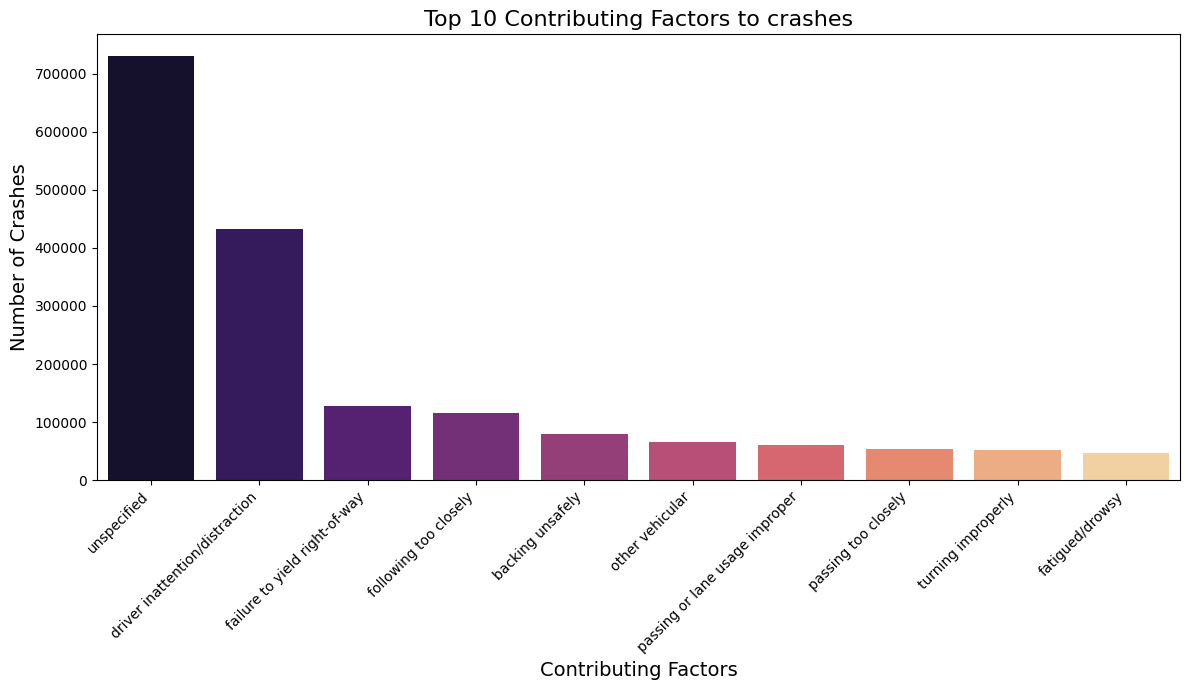

In [ ]:
#EDA1: Vehicles contributing to accidents

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))

#Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('Contributing Factors', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**EDA2: Vehicle Types Involved In Crashes**

**Inference:**

The most common vehicles involved in accidents are Sedans, SUVs and passenger vehicles.

Taxis, tracks and buses contribute to accidents at a lower rate.

The graph indicates that personal and commercial vehicles contribute differently to crash patterns.


<ipython-input-24-ed97aa74a998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


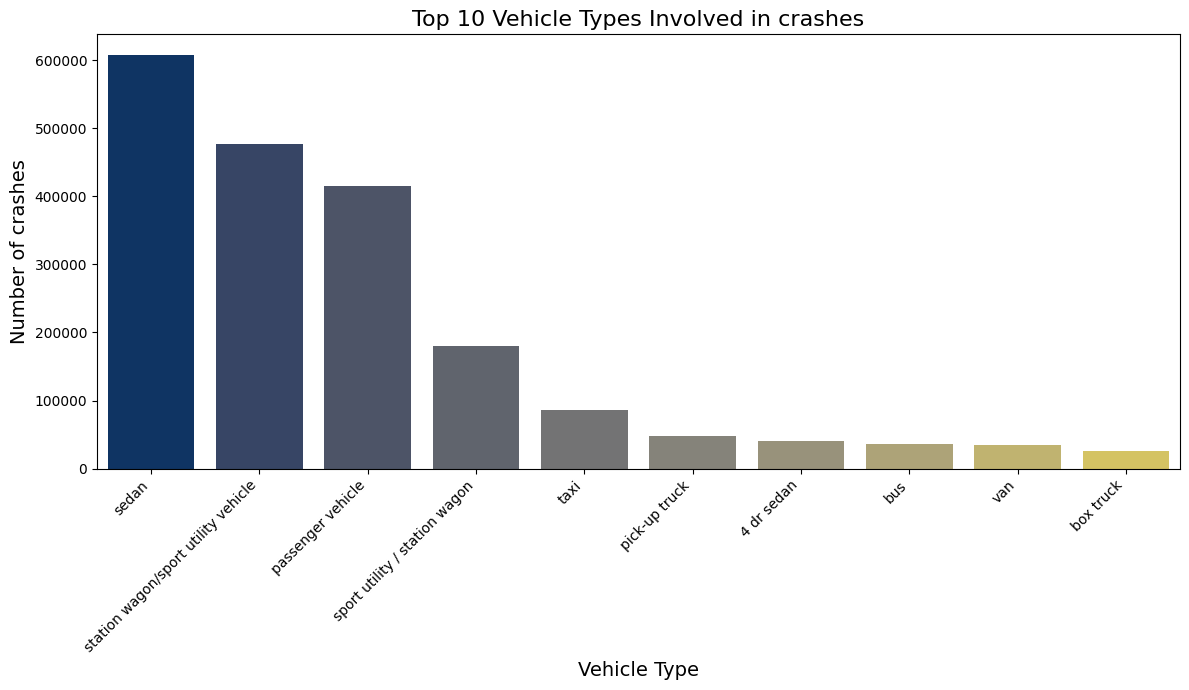

In [ ]:
#EDA2: Vehicle Types Involved in Crashes

top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**EDA3: Aggregrating Data for Cyclists and Motorist**

**Inference:**

Motorist injuries dominates pedestarian/cyclist injuries.

But pedastrian are more vulnerable as fatalities are more for pedastrians compared to motorists.

<ipython-input-25-d5ace6743f69>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


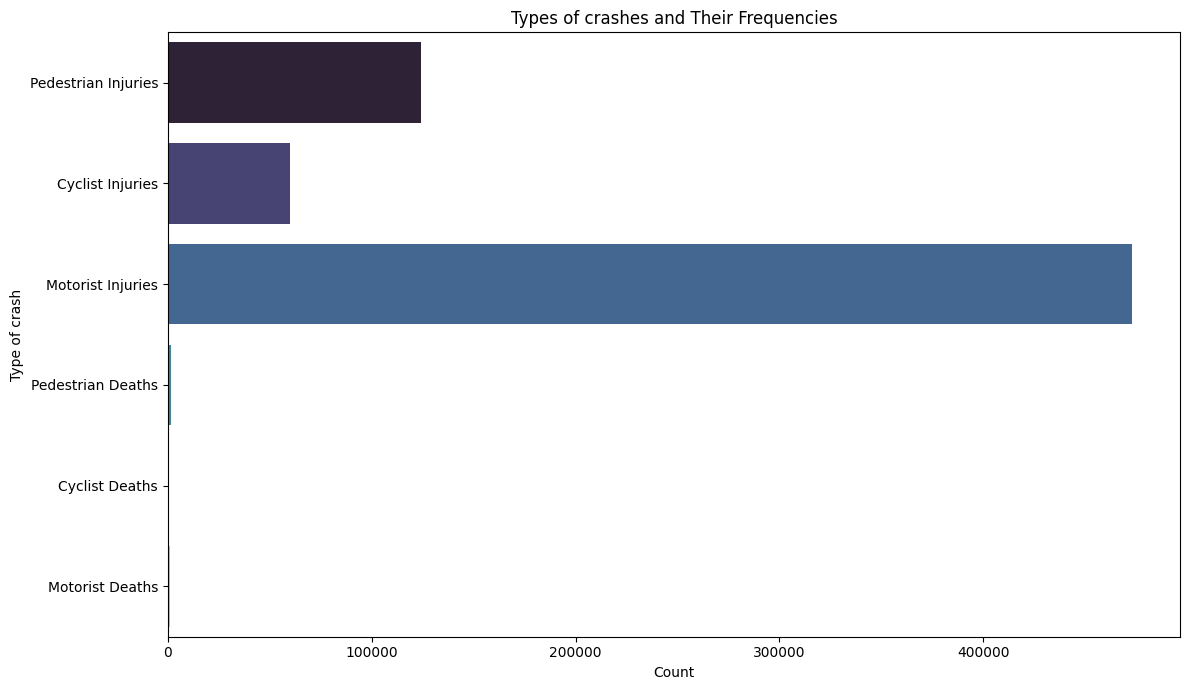

In [ ]:
#EDA3: Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


**EDA4: Time Series Analysis**

**Inference:**

The graph shows peak crash times:

**8-10 AM:** Likely due to rush hour traffic

**4-6 PM:**  Higher due to people commuting back home

**6-11 PM:** Steady decrease in accidents due to reduced traffic


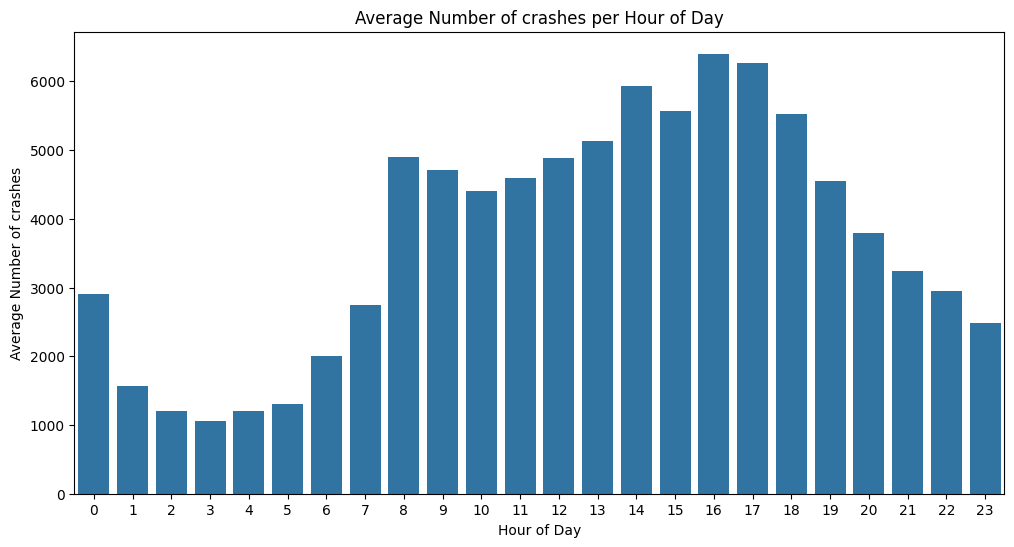

In [ ]:
#EDA4: Time Series Analysis

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime( data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()

**EDA5: Crashes per month for last 12 years**

**Inference:**

The graph is relatively stable from 2012 to 2019 but we see a sudden drop in accidents from around early 2020. It is likey due to COVID-19 related lockdowns.

Crashes increased again after pandemic but they are lower then pre pandemic levels.
This suggests a potential long-term shift in traffic patterns due to COVID-19.

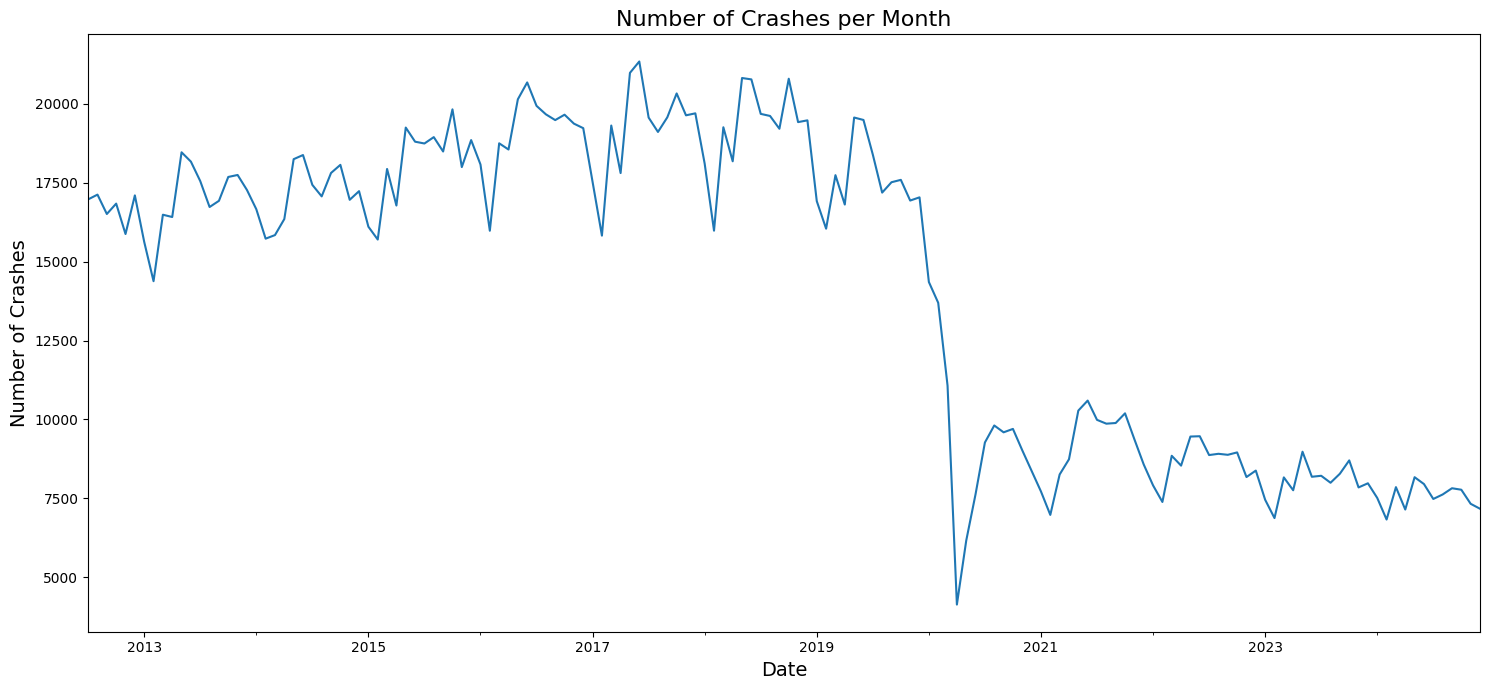

In [ ]:
# EDA5: Number of crashes per month
#Crashes datewise

# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

**EDA6: Residuals In Time Series**

**Inference**

High Amount of Fluctuations are seen around the Covid-19 period which can be due to less cars and less civilians outside.

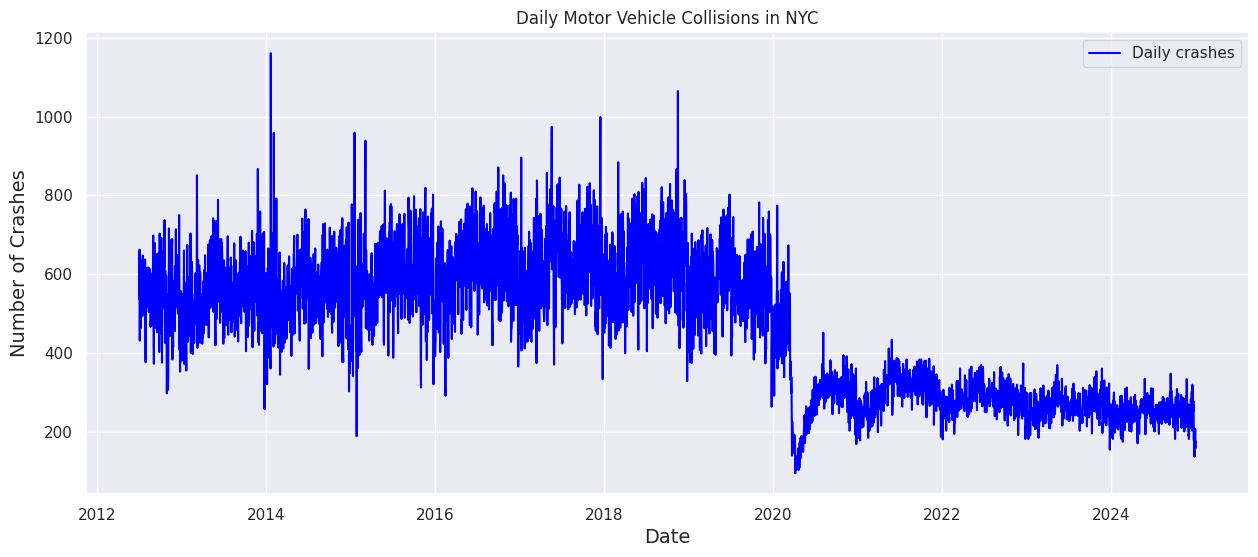

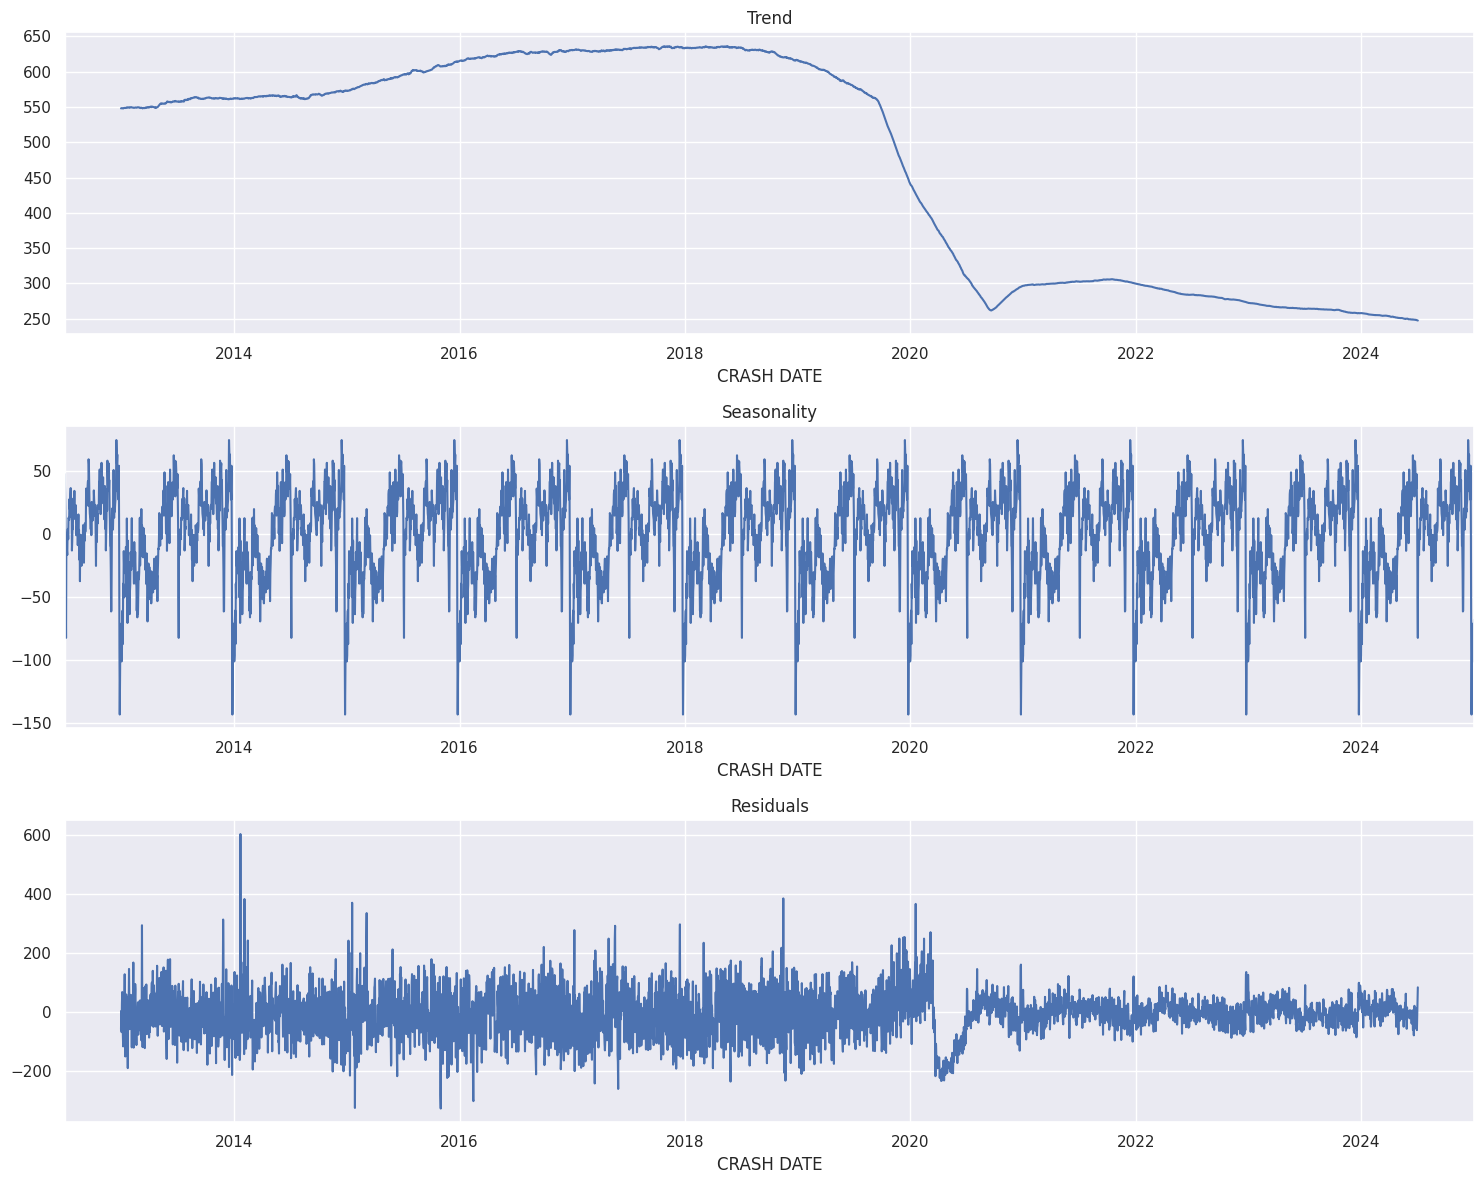

In [ ]:
#EDA6: Residuals in time series
from statsmodels.tsa.seasonal import seasonal_decompose
# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes.index,daily_crashes.values, label='Daily crashes',color='blue')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Crashes', fontsize = 14)
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

**EDA7: Distribution of Data by Boroughs**

**Inference:**

Brooklyn has the most number of crashes followed by queens and manhattan.

Staten Island has the least crashes.

This distribution actually follows the population density trends in NYC.

<ipython-input-29-e7b0cfed67fe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


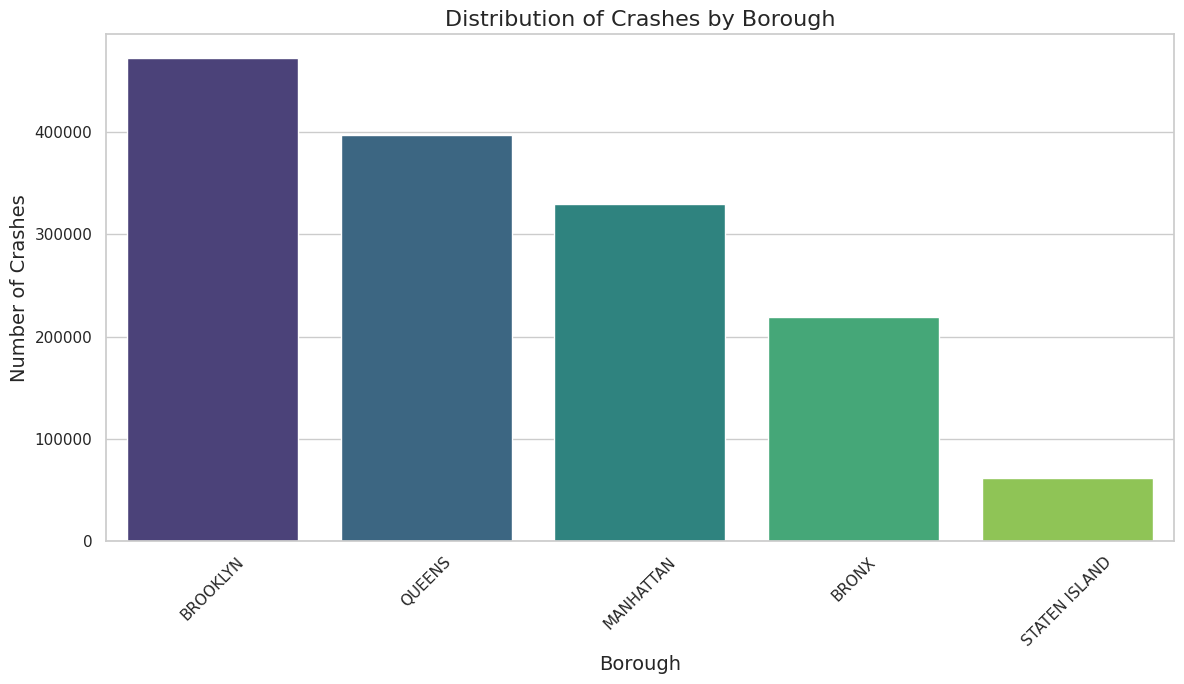

In [ ]:
#EDA7: Distribution of data

#A bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**EDA8: Heatmaps**

**Inference**

There is a cluster of collisions in the vicinity of New York City, encompassing Manhattan and Brooklyn. There are also a few spots on the heatmap that show the severity of crashes close to the Manhattan Bridge, the far end of the Brooklyn-Queens Expressway, and Nostrand Avenue. There are several areas in East New York as well.

In [ ]:
#EDA8 HeatMaps:

from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")

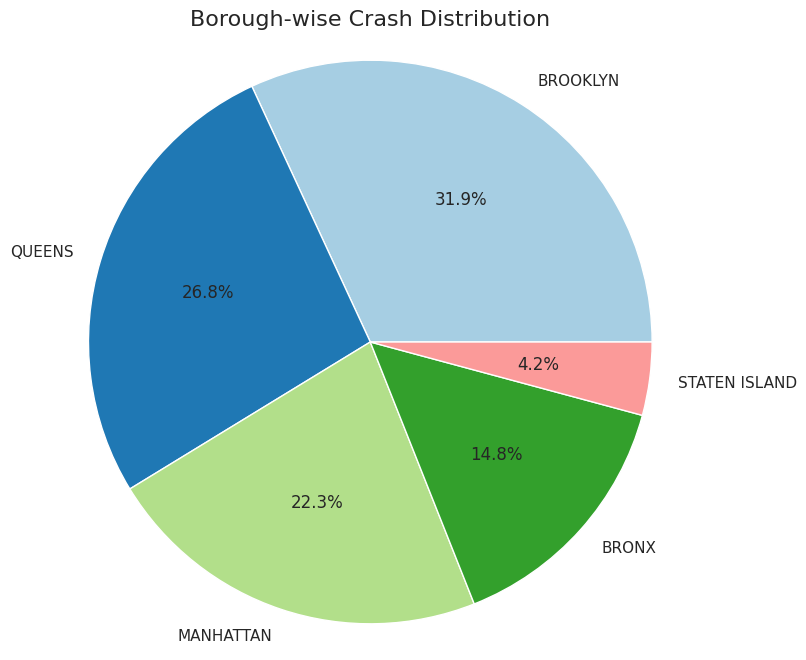

In [ ]:
borough_crashes = data['BOROUGH'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(borough_crashes, labels=borough_crashes.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Borough-wise Crash Distribution', fontsize=16)
plt.axis('equal')
plt.show()

**EDA9: Severity plot on a web page (HTML) / Extension of EDA-8**

**Inference**




In [ ]:
#EDA 9: Severity HTML Page

#Continuation to building heatmap
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "Black"  # Fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "Red"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "Green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")

In [ ]:
#LET'S FIND ANSWERS TO:
#What is the correlation between the time of day and the severity of crashes (fatalities, injuries) across different boroughs?
#How do crash frequencies and causes vary in underserved communities compared to more affluent areas (based on zip codes)?

In [ ]:
columns = ['BOROUGH', 'CRASH TIME', 'ZIP CODE', 'NUMBER OF PERSONS KILLED',
           'NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']
m5_data = data[columns]

#CRASH_TIME to datetime
m5_data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

#missing values
m5_data.dropna()

<ipython-input-33-757464d5f6d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m5_data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour


,BOROUGH,CRASH TIME,ZIP CODE,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,VEHICLE TYPE CODE 1,CONTRIBUTING FACTOR VEHICLE 1
3,BROOKLYN,9,11208,0.0,0.0,sedan,unspecified
4,BROOKLYN,8,11233,0.0,0.0,unspecified,unspecified
7,BRONX,8,10475,0.0,2.0,sedan,unspecified
8,BROOKLYN,21,11207,0.0,0.0,sedan,driver inexperience
9,MANHATTAN,14,10017,0.0,0.0,sedan,passing too closely
...,...,...,...,...,...,...,...
2146655,BROOKLYN,15,11207,0.0,1.0,sedan,unspecified
2146658,BRONX,9,10461,0.0,0.0,station wagon/sport utility vehicle,backing unsafely
2146659,BROOKLYN,15,11237,0.0,1.0,sedan,driver inexperience
2146660,MANHATTAN,11,10024,0.0,0.0,dump,passing too closely


**EDA10: Plotting Hours VS Injuries**

**Inference**

According to the severity plot, the busiest intersections, such as Clearview Expressway, were the most hazardous. Hoover Avenues followed, with more injuries observed at Queens Boulevard and Long Island Highway. saw one at the Grand Highway.

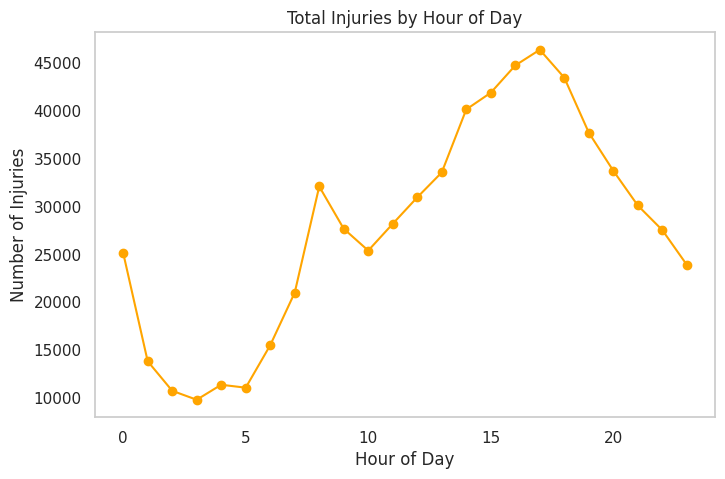

In [ ]:
hourly_injuries = m5_data.groupby('CRASH TIME')['NUMBER OF PERSONS INJURED'].sum()

#line chart
plt.figure(figsize=(8, 5))
plt.plot(hourly_injuries.index, hourly_injuries.values, marker='o', color='orange')
plt.title("Total Injuries by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Injuries")
plt.grid()
plt.show()

In [ ]:
data = data.dropna()

**EDA 11: Crashes by location and Map based analysis**

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

zip_crash_data = data.groupby('ZIP CODE').size().reset_index(name='CRASH COUNT')

# Convert CRASH DATE and CRASH TIME to strings
data['CRASH DATE'] = data['CRASH DATE'].astype(str)
data['CRASH TIME'] = data['CRASH TIME'].astype(str)

data["geometry"] = data.apply(
    lambda row: Point(row["LONGITUDE"], row["LATITUDE"]) if pd.notnull(row["LONGITUDE"]) and pd.notnull(row["LATITUDE"]) else None,
    axis=1
)

# Filter out rows with missing geometries
data = data[data["geometry"].notnull()]

gdf = gpd.GeoDataFrame(data, geometry="geometry")

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Ensure ZIP CODE is a string
gdf['ZIP CODE'] = gdf['ZIP CODE'].astype(str)

# Merge with geo data
merged = gdf.merge(zip_crash_data, on='ZIP CODE')

# Create map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
folium.Choropleth(
    geo_data=merged,
    name="choropleth",
    data=merged,
    columns=["ZIP CODE", "CRASH COUNT"],
    key_on="feature.properties.ZIP CODE",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

# Save and display map
m.save("crash_map.html")
m

**EDA12: Season-wise Analysis of Total Injuries and Deaths**

**Inference:**

Fall and Summer have the highest number of affected indviduals.
This could be due to the fact that more people are out in these seasons either on vacations, cruising the city for fun or doing outdoor activies.

While spring and winter have less affected indviduals.
This could be due to the fact that NYC gets chilly around this time and people usually don't step out much.

<ipython-input-43-cbd34fc1cf5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Injuries', data=season_injuries, palette='coolwarm')


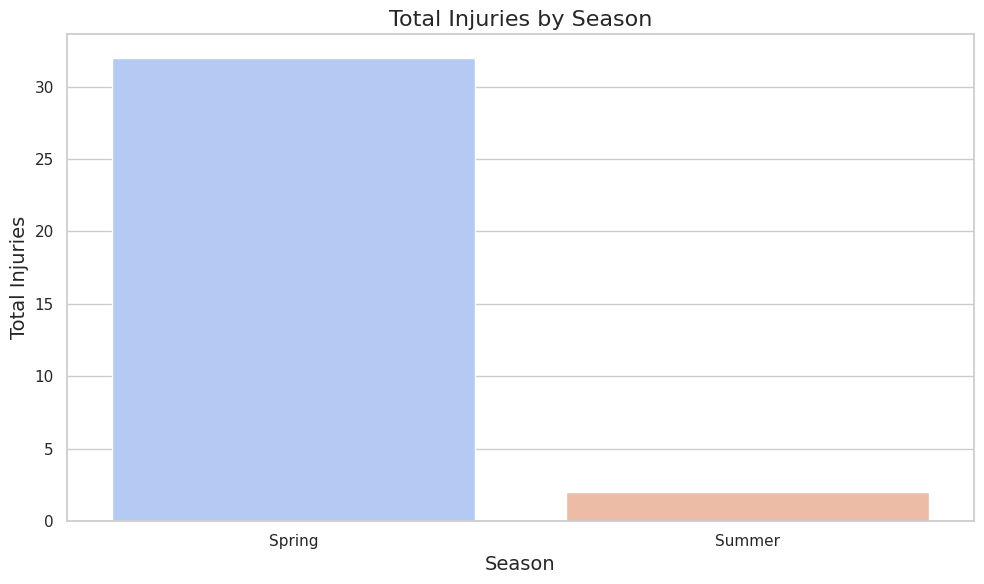

In [ ]:
#EDA 12: Season-wise Analysis of Total Injuries and Deaths
# Grouping the data by season and summing the total injuries
season_injuries = data.groupby('Season')['Total Injuries'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Injuries', data=season_injuries, palette='coolwarm')
plt.title('Total Injuries by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Injuries', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-44-b015db84fc24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Deaths', data=season_injuries, palette='coolwarm')


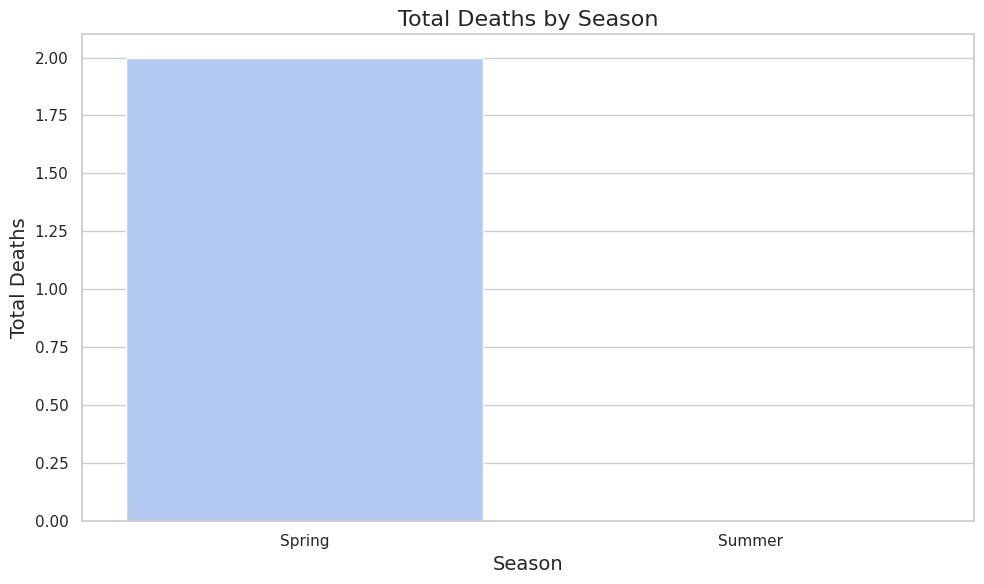

In [ ]:
# Grouping the data by season and summing the total deaths
season_injuries = data.groupby('Season')['Total Deaths'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Deaths', data=season_injuries, palette='coolwarm')
plt.title('Total Deaths by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-45-cca2be45f5a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Affected', data=season_injuries, palette='coolwarm')


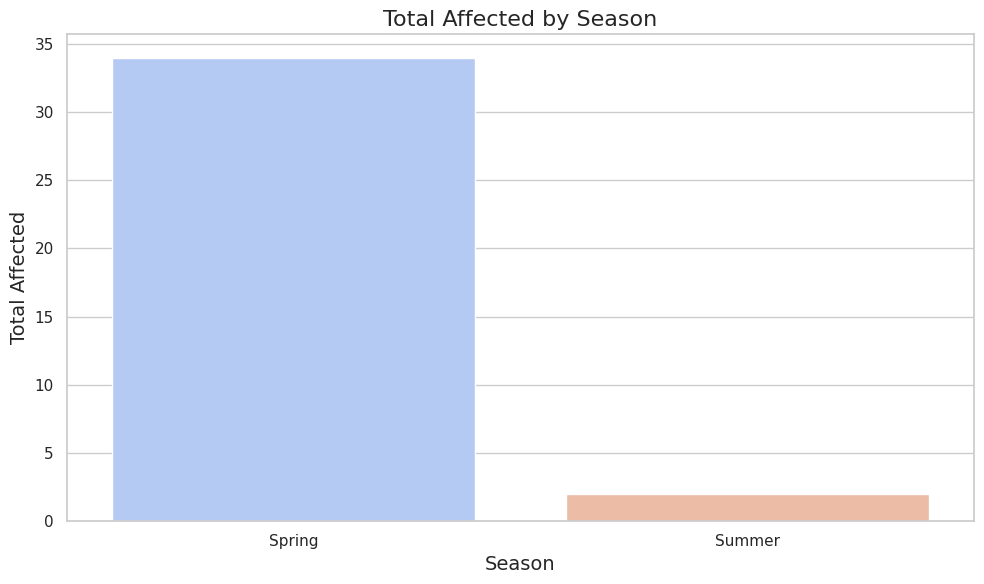

In [ ]:
# Grouping the data by season and summing the total affected
season_injuries = data.groupby('Season')['Total Affected'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Affected', data=season_injuries, palette='coolwarm')
plt.title('Total Affected by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Affected', fontsize=14)
plt.tight_layout()
plt.show()